# 루브릭

1. 인물모드 사진을 성공적으로 제작하였다.	
 - 아웃포커싱 효과가 적용된 인물모드 사진과 동물 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다.
2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.	
 - 인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다.
3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.	
 - semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 이유와 함께 제시하였다.

---
# 프로젝트

In [1]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인
import os
from importlib.metadata import version
import cv2
import pixellib
import numpy as np
from matplotlib import pyplot as plt
from pixellib.semantic import semantic_segmentation

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


## step 1. 인물모드 직접 해 보기

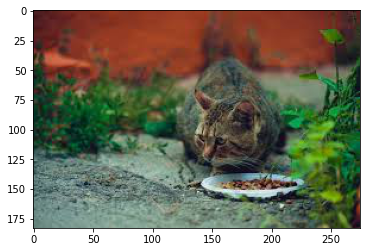

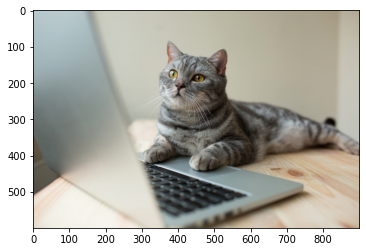

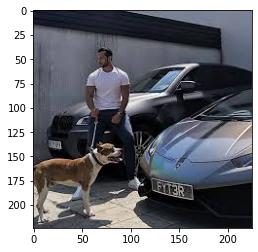

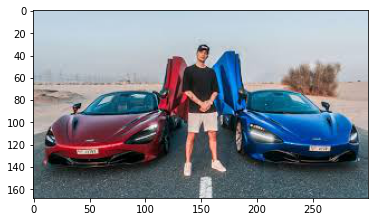

In [4]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'  
cat_1 = cv2.imread(img_path + 'cat_1.png') 
cat_2 = cv2.imread(img_path + 'cat_2.png') 
person_1 = cv2.imread(img_path + 'person_1.png') 
person_2 = cv2.imread(img_path + 'person_2.png') 

plt.imshow(cv2.cvtColor(cat_1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(cat_2, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(person_1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(person_2, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [ ]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

0. background
1. aeroplane
2. bicycle
3. bird
4. boat
5. bottle
6. bus
7. car
8. cat
9. chair
10. cow
11. diningtable
12. dog
13. horse
14. motorbike
15. person
16. pottedplant
17. sheep
18. sofa
19. train
20. TV

In [81]:
segvalues_1, o_cat_1 = model.segmentAsPascalvoc(img_path + 'cat_1.png') 
segvalues_2, o_cat_2 = model.segmentAsPascalvoc(img_path + 'cat_2.png') 
segvalues_3, o_person_1 = model.segmentAsPascalvoc(img_path + 'person_1.png') 
segvalues_4, o_person_2 = model.segmentAsPascalvoc(img_path + 'person_2.png') 

In [66]:
segvalues = {'cat_1' :segvalues_1, 'cat_2' : segvalues_2, 'person_1' : segvalues_3, 'person_2' : segvalues_4}

for p,i in segvalues.items():
    print('<'+p+'>')
    for class_id in i['class_ids']:
        print(LABEL_NAMES[class_id])
    print('-----------------------')

<cat_1>
background
cat
-----------------------
<cat_2>
background
cat
-----------------------
<person_1>
background
car
dog
person
-----------------------
<person_2>
background
car
person
-----------------------


In [69]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
print('car : ', colormap[7])
print('cat : ', colormap[8])
print('dog : ', colormap[12])
print('person : ', colormap[15])
# 8. cat,  15. person,  7. car,  12. dog

car :  [128 128 128]
cat :  [64  0  0]
dog :  [ 64   0 128]
person :  [192 128 128]


In [70]:
car_color = (128,128,128) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
cat_color = (0,0,64)
dog_color = (128,0,64)
person_color = (128,128,192)

## Cat

In [123]:
seg_map_cat_1 = np.all(o_cat_1==cat_color, axis=-1) 
#plt.imshow(seg_map_cat_1, cmap='gray')
#plt.show()

seg_map_cat_2 = np.all(o_cat_2==cat_color, axis=-1) 
#plt.imshow(seg_map_cat_2, cmap='gray')
#plt.show()

In [124]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_cat_1 = cat_1.copy()
img_mask_c1 = seg_map_cat_1.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask_c1, cv2.COLORMAP_JET)
img_cat_1 = cv2.addWeighted(img_cat_1, 0.6, color_mask, 0.4, 0.0)

#plt.imshow(cv2.cvtColor(img_cat_1, cv2.COLOR_BGR2RGB))
#plt.show()

img_cat_2 = cat_2.copy()
img_mask_c2 = seg_map_cat_2.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask_c2, cv2.COLORMAP_JET)
img_cat_2 = cv2.addWeighted(img_cat_2, 0.6, color_mask, 0.4, 0.0)

#plt.imshow(cv2.cvtColor(img_cat_2, cv2.COLOR_BGR2RGB))
#plt.show()

In [125]:
cat1_blur = cv2.blur(cat_1, (15,15))

#plt.imshow(cv2.cvtColor(cat1_blur, cv2.COLOR_BGR2RGB))
#plt.show()

cat2_blur = cv2.blur(cat_2, (20,20))

#plt.imshow(cv2.cvtColor(cat2_blur, cv2.COLOR_BGR2RGB))
#plt.show()

In [126]:
img_mask_color_c1 = cv2.cvtColor(img_mask_c1, cv2.COLOR_GRAY2BGR)
img_bg_mask_c1 = cv2.bitwise_not(img_mask_color_c1)
img_bg_blur_c1 = cv2.bitwise_and(cat1_blur, img_bg_mask_c1)
#plt.imshow(cv2.cvtColor(img_bg_blur_c1, cv2.COLOR_BGR2RGB))
#plt.show()

img_mask_color_c2 = cv2.cvtColor(img_mask_c2, cv2.COLOR_GRAY2BGR)
img_bg_mask_c2 = cv2.bitwise_not(img_mask_color_c2)
img_bg_blur_c2 = cv2.bitwise_and(cat2_blur, img_bg_mask_c2)
#plt.imshow(cv2.cvtColor(img_bg_blur_c2, cv2.COLOR_BGR2RGB))
#plt.show()

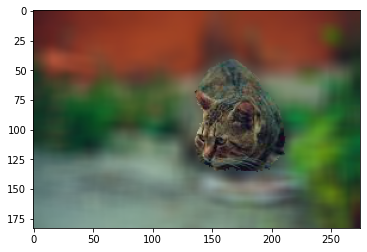

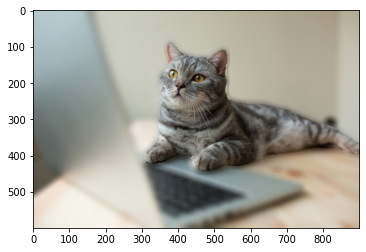

In [94]:
img_concat_c1 = np.where(img_mask_color_c1==255, cat_1, img_bg_blur_c1)

plt.imshow(cv2.cvtColor(img_concat_c1, cv2.COLOR_BGR2RGB))
plt.show()

img_concat_c2 = np.where(img_mask_color_c2==255, cat_2, img_bg_blur_c2)

plt.imshow(cv2.cvtColor(img_concat_c2, cv2.COLOR_BGR2RGB))
plt.show()

## Dog

In [127]:
seg_map_d = np.all(o_person_1==dog_color, axis=-1) 

#plt.imshow(seg_map_d, cmap='gray')
#plt.show()

In [129]:
img_dog = person_1.copy()
img_mask_d = seg_map_d.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask_d, cv2.COLORMAP_JET)
img_dog = cv2.addWeighted(img_dog, 0.6, color_mask, 0.4, 0.0)

#plt.imshow(cv2.cvtColor(img_dog, cv2.COLOR_BGR2RGB))
#plt.show()

In [131]:
dog_blur = cv2.blur(person_1, (15,15))

#plt.imshow(cv2.cvtColor(dog_blur, cv2.COLOR_BGR2RGB))
#plt.show()

In [132]:
img_mask_color_d = cv2.cvtColor(img_mask_d, cv2.COLOR_GRAY2BGR)
img_bg_mask_d = cv2.bitwise_not(img_mask_color_d)
img_bg_blur_d = cv2.bitwise_and(dog_blur, img_bg_mask_d)
#plt.imshow(cv2.cvtColor(img_bg_blur_d, cv2.COLOR_BGR2RGB))
#plt.show()

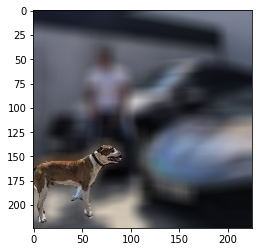

In [107]:
img_concat_d = np.where(img_mask_color_d==255, person_1, img_bg_blur_d)

plt.imshow(cv2.cvtColor(img_concat_d, cv2.COLOR_BGR2RGB))
plt.show()

## Car

In [133]:
seg_map_car_1 = np.all(o_person_1==car_color, axis=-1) 
print(seg_map.shape) 
#plt.imshow(seg_map_car_1, cmap='gray')
#plt.show()

seg_map_car_2 = np.all(o_person_2==car_color, axis=-1) 
print(seg_map.shape) 
#plt.imshow(seg_map_car_2, cmap='gray')
#plt.show()

(224, 225)
(224, 225)


In [134]:
img_car_1 = person_1.copy()
img_mask_cc1 = seg_map_car_1.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask_cc1, cv2.COLORMAP_JET)
img_car_1 = cv2.addWeighted(img_car_1, 0.6, color_mask, 0.4, 0.0)

#plt.imshow(cv2.cvtColor(img_car_1, cv2.COLOR_BGR2RGB))
#plt.show()

img_car_2 = person_2.copy()
img_mask_cc2 = seg_map_car_2.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask_cc2, cv2.COLORMAP_JET)
img_car_2 = cv2.addWeighted(img_car_2, 0.6, color_mask, 0.4, 0.0)

#plt.imshow(cv2.cvtColor(img_car_2, cv2.COLOR_BGR2RGB))
#plt.show()

In [135]:
car1_blur = cv2.blur(person_1, (15,15))
car2_blur = cv2.blur(person_2, (20,20))

In [136]:
img_mask_color_cc1 = cv2.cvtColor(img_mask_cc1, cv2.COLOR_GRAY2BGR)
img_bg_mask_cc1 = cv2.bitwise_not(img_mask_color_cc1)
img_bg_blur_cc1 = cv2.bitwise_and(car1_blur, img_bg_mask_cc1)
#plt.imshow(cv2.cvtColor(img_bg_blur_cc1, cv2.COLOR_BGR2RGB))
#plt.show()

img_mask_color_cc2 = cv2.cvtColor(img_mask_cc2, cv2.COLOR_GRAY2BGR)
img_bg_mask_cc2 = cv2.bitwise_not(img_mask_color_cc2)
img_bg_blur_cc2 = cv2.bitwise_and(car2_blur, img_bg_mask_cc2)
#plt.imshow(cv2.cvtColor(img_bg_blur_cc2, cv2.COLOR_BGR2RGB))
#plt.show()

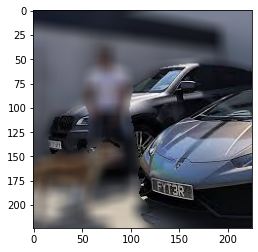

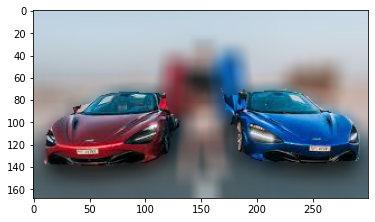

In [137]:
img_concat_cc1 = np.where(img_mask_color_cc1==255, person_1, img_bg_blur_cc1)

plt.imshow(cv2.cvtColor(img_concat_cc1, cv2.COLOR_BGR2RGB))
plt.show()

img_concat_cc2 = np.where(img_mask_color_cc2==255, person_2, img_bg_blur_cc2)

plt.imshow(cv2.cvtColor(img_concat_cc2, cv2.COLOR_BGR2RGB))
plt.show()

## Person

In [138]:
seg_map_person_1 = np.all(o_person_1==person_color, axis=-1) 

#plt.imshow(seg_map_person_1, cmap='gray')
#plt.show()

seg_map_person_2 = np.all(o_person_2==person_color, axis=-1) 

#plt.imshow(seg_map_person_2, cmap='gray')
#plt.show()

In [139]:
img_person_1 = person_1.copy()
img_mask_p1 = seg_map_person_1.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask_p1, cv2.COLORMAP_JET)
img_person_1 = cv2.addWeighted(img_person_1, 0.6, color_mask, 0.4, 0.0)

#plt.imshow(cv2.cvtColor(img_person_1, cv2.COLOR_BGR2RGB))
#plt.show()

img_person_2 = person_2.copy()
img_mask_p2 = seg_map_person_2.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask_p2, cv2.COLORMAP_JET)
img_person_2 = cv2.addWeighted(img_person_2, 0.6, color_mask, 0.4, 0.0)

#plt.imshow(cv2.cvtColor(img_person_2, cv2.COLOR_BGR2RGB))
#plt.show()

In [119]:
person1_blur = cv2.blur(person_1, (15,15))
person2_blur = cv2.blur(person_2, (20,20))

In [140]:
img_mask_color_p1 = cv2.cvtColor(img_mask_p1, cv2.COLOR_GRAY2BGR)
img_bg_mask_p1 = cv2.bitwise_not(img_mask_color_p1)
img_bg_blur_p1 = cv2.bitwise_and(car1_blur, img_bg_mask_p1)
#plt.imshow(cv2.cvtColor(img_bg_blur_p1, cv2.COLOR_BGR2RGB))
#plt.show()

img_mask_color_p2 = cv2.cvtColor(img_mask_p2, cv2.COLOR_GRAY2BGR)
img_bg_mask_p2 = cv2.bitwise_not(img_mask_color_p2)
img_bg_blur_p2 = cv2.bitwise_and(car2_blur, img_bg_mask_p2)
#plt.imshow(cv2.cvtColor(img_bg_blur_p2, cv2.COLOR_BGR2RGB))
#plt.show()

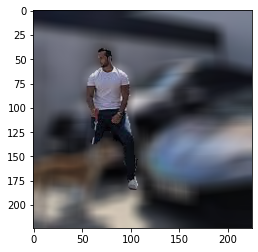

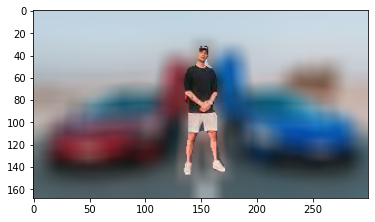

In [122]:
img_concat_p1 = np.where(img_mask_color_p1==255, person_1, img_bg_blur_p1)

plt.imshow(cv2.cvtColor(img_concat_p1, cv2.COLOR_BGR2RGB))
plt.show()

img_concat_p2 = np.where(img_mask_color_p2==255, person_2, img_bg_blur_p2)

plt.imshow(cv2.cvtColor(img_concat_p2, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2. 사진에서 문제점 찾기
- 추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다. 표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.

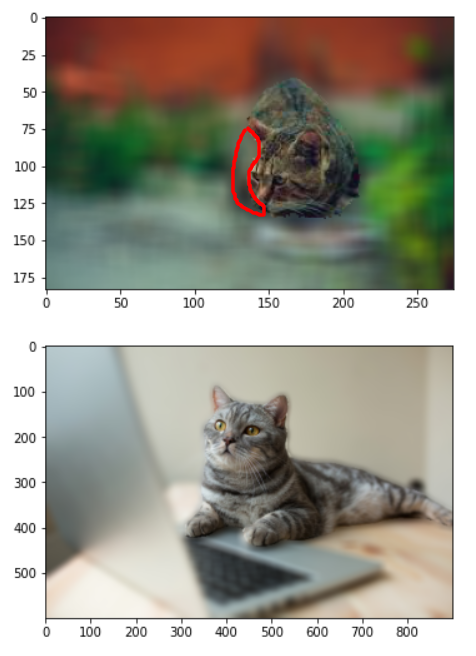
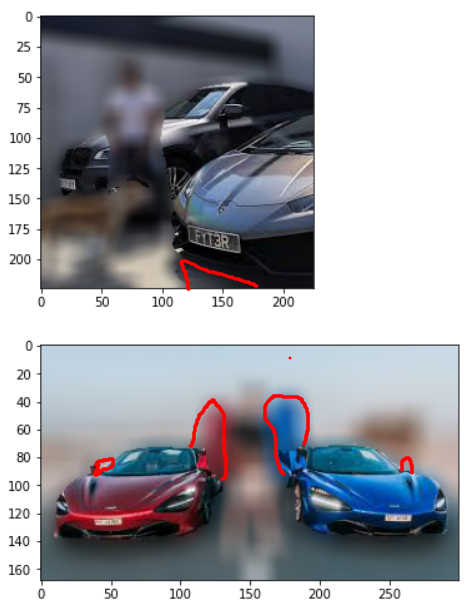
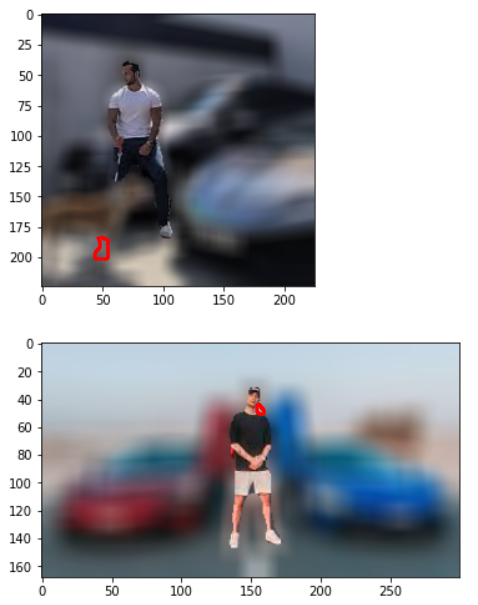


- 어느정도 인식에 오류가 있는 것으로 확인된다.
- 사진에서의 물체의 윤곽선이 배경과 비슷할 경우 인식하지 못하는 것을 볼 수 있으며 다른 사물 뒤에 겹칠 경우에도 인식이 안된 부분이 생겼고 차 문이 일반적인 차 문이 아닌 위로 열리는 스포츠카 같은 경우도 인식을 못 하는 것을 확인하였다.

## Step 3. 해결 방법 모색

- 객체의 경계선을 더욱이 뚜렷하게 하기 위해 모서리 감지 알고리즘(Canny Edge Detection, Sobel Edge Detection, Laplacian Edge Detection 등)을 사용할 수 있을 것 같다.
- 이미지 분할 알고리즘(U-Net, Mask R-CNN 등) 같은 딥러닝 기반 알고리즘을 사용랗 수 있을 듯 하다.

#### Multi-scale Feature Aggregation
 - 이미지의 고차원 정보를 낮은 차원으로 압축하여 표현할 때 하지만 입력 이미지의 크기가 다양할 경우, 특징 맵에서 발생하는 정보 손실이나 왜곡으로 인해 정확도가 저하될 수 있습니다.
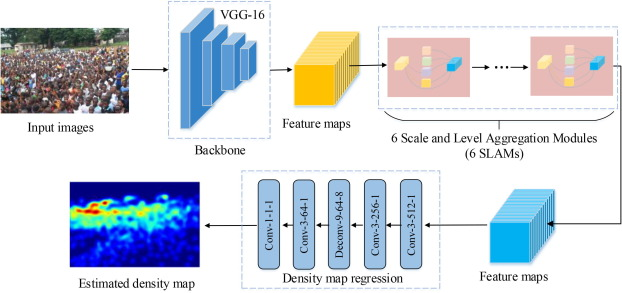